## IMDB Top 250 Movies Analysis

### Introduction

In this EDA porject, we will extract list of Top 250 movies from IMDB Top 250 Movies page and perform exploratory data analysis on same.

### Outline
1) Extracting Movie Details from IMDB  
2) Data Cleaning  
3) Movie Release Years  
4) Top Directors  
5) Top Actors  
6) Movie Ratings


<hr style="border-top: 2px solid blue; margin-top: 1px; margin-bottom: 1px"></hr>

In [1]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set_style("darkgrid")    

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Extracting Movie Details from IMDB

In [3]:
response = requests.get('https://www.imdb.com/chart/top/?ref_=nv_mv_250')
content = response.content
data = BeautifulSoup(content, 'html.parser')

In [4]:
data.head.title.text

'IMDb Top 250 - IMDb'

In [5]:
table = data.find_all('table')

In [6]:
imdb_top250 = pd.read_html(str(table), flavor='bs4')[0]
imdb_top250.head()

,Unnamed: 0,Rank & Title,IMDb Rating,Your Rating,Unnamed: 4
0,NaN,1. The Shawshank Redemption (1994),9.2,12345678910 NOT YET RELEASED Seen,NaN
1,NaN,2. The Godfather (1972),9.1,12345678910 NOT YET RELEASED Seen,NaN
2,NaN,3. The Godfather: Part II (1974),9.0,12345678910 NOT YET RELEASED Seen,NaN
3,NaN,4. The Dark Knight (2008),9.0,12345678910 NOT YET RELEASED Seen,NaN
4,NaN,5. 12 Angry Men (1957),8.9,12345678910 NOT YET RELEASED Seen,NaN


In [7]:
del(imdb_top250['Unnamed: 0'],imdb_top250['Unnamed: 4'],imdb_top250['Your Rating'])

In [12]:
imdb_top250.head()

,Rank & Title,IMDb Rating
0,1. The Shawshank Redemption (1994),9.2
1,2. The Godfather (1972),9.1
2,3. The Godfather: Part II (1974),9.0
3,4. The Dark Knight (2008),9.0
4,5. 12 Angry Men (1957),8.9


On the webpage, if we hover over the Title we can see main character names alongwth director's name indicated by (dir.)    
Similarly, if we hover over the rating, we can see no of users who rated the movie  
  
Since, these details are not in the table itself, so these are not extracted when we read the table via pandas.  
To get these details, we would need to find the relevant elements in webpage source, extract and add to dataframe

In [13]:
# Get all Table Rows
rows = data.find('tbody').find_all('tr')

In [14]:
rows

[<tr>
 <td class="posterColumn">
 <span data-value="1" name="rk"></span>
 <span data-value="9.220311426336405" name="ir"></span>
 <span data-value="7.791552E11" name="us"></span>
 <span data-value="2446480" name="nv"></span>
 <span data-value="-1.779688573663595" name="ur"></span>
 <a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" height="67" src="https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UY67_CR0,0,45,67_AL_.jpg" width="45"/>
 </a> </td>
 <td class="titleColumn">
       1.
       <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
 <span class="secondaryInfo">(1994)</span>
 </td>
 <td class="ratingColumn imdbRating">
 <strong title="9.2 based on 2,446,480 user ratings">9.2</strong>
 </td>
 <td class="ratingColumn">
 <div class="seen-widget seen-widget-tt0111161 pending" data-titleid="tt0111161">
 <div class="boundary">
 <div clas

In [15]:
# Loop through each row, and get actors+director name from 1st column and No of Users who rated the movie from 2nd column
starring = []
users_rated = []

for i in range(0,250):
    cols = rows[i].find_all('td')
    starring.append(cols[1].find(title=True).get('title'))
    users_rated.append(cols[2].find(title=True).get('title'))

In [16]:
imdb_top250['Starring'] = starring
imdb_top250['users_rated'] = users_rated

imdb_top250.head()

,Rank & Title,IMDb Rating,Starring,users_rated
0,1. The Shawshank Redemption (1994),9.2,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...","9.2 based on 2,446,480 user ratings"
1,2. The Godfather (1972),9.1,"Francis Ford Coppola (dir.), Marlon Brando, Al...","9.1 based on 1,693,800 user ratings"
2,3. The Godfather: Part II (1974),9.0,"Francis Ford Coppola (dir.), Al Pacino, Robert...","9.0 based on 1,176,606 user ratings"
3,4. The Dark Knight (2008),9.0,"Christopher Nolan (dir.), Christian Bale, Heat...","9.0 based on 2,402,318 user ratings"
4,5. 12 Angry Men (1957),8.9,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb","8.9 based on 724,118 user ratings"


Now, our table is complete, so we can proceed with data cleaning

### Data Cleaning

In [17]:
imdb = imdb_top250.copy()

In [18]:
imdb['Title'] = imdb['Rank & Title'].str.split('(').str[0]

In [19]:
imdb['Rank'] = imdb['Title'].str.split('.').str[0]

In [20]:
imdb['Year'] = imdb['Rank & Title'].str.split('(').str[1].str.replace(')','')

In [21]:
del(imdb['Rank & Title'])

In [22]:
imdb['Director'] = imdb['Starring'].str.split(',').str[0].str.replace('dir.','').\
str.replace('(','').str.replace(')','').str.strip()

In [23]:
imdb['Starring'] = imdb['Starring'].str.split(')').str[1].str[2:]

In [24]:
imdb['users_rated'] = imdb['users_rated'].str.split().str[3]

In [25]:
imdb.head()

,IMDb Rating,Starring,users_rated,Title,Rank,Year,Director
0,9.2,"Tim Robbins, Morgan Freeman","2,446,480",1. The Shawshank Redemption,1,1994,Frank Darabont
1,9.1,"Marlon Brando, Al Pacino","1,693,800",2. The Godfather,2,1972,Francis Ford Coppola
2,9.0,"Al Pacino, Robert De Niro","1,176,606",3. The Godfather: Part II,3,1974,Francis Ford Coppola
3,9.0,"Christian Bale, Heath Ledger","2,402,318",4. The Dark Knight,4,2008,Christopher Nolan
4,8.9,"Henry Fonda, Lee J. Cobb","724,118",5. 12 Angry Men,5,1957,Sidney Lumet


In [26]:
imdb.dtypes

IMDb Rating    float64
Starring        object
users_rated     object
Title           object
Rank            object
Year            object
Director        object
dtype: object

In [27]:
imdb['users_rated'] = imdb['users_rated'].str.replace(',','').astype(int)

In [28]:
imdb['Year'] = imdb['Year'].astype(int)

### Movie Release Years

In [29]:
imdb['Year'].value_counts().sort_values(ascending=False).head(10)

1995    8
1957    7
2018    7
2004    6
2019    6
1994    6
1997    6
2000    6
2009    6
2003    5
Name: Year, dtype: int64

More than 20 years later, 1995 remains the year with most movies released which ended up in top 250, and 1957 is still in second spot !!

#### Movies released in 1995

In [30]:
imdb[imdb['Year'] == 1995]

,IMDb Rating,Starring,users_rated,Title,Rank,Year,Director
19,8.6,"Morgan Freeman, Brad Pitt",1505966,20. Se7en,20,1995,David Fincher
33,8.5,"Kevin Spacey, Gabriel Byrne",1023472,34. The Usual Suspects,34,1995,Bryan Singer
80,8.3,"Tom Hanks, Tim Allen",921716,81. Toy Story,81,1995,John Lasseter
83,8.3,"Mel Gibson, Sophie Marceau",984621,84. Braveheart,84,1995,Mel Gibson
125,8.2,"Al Pacino, Robert De Niro",602369,126. Heat,126,1995,Michael Mann
142,8.2,"Robert De Niro, Sharon Stone",484903,143. Casino,143,1995,Martin Scorsese
188,8.1,"Ethan Hawke, Julie Delpy",284776,189. Before Sunrise,189,1995,Richard Linklater
219,8.0,"Vincent Cassel, Hubert Koundé",158690,220. La haine,220,1995,Mathieu Kassovitz


#### Movies released in 1957

In [31]:
imdb[imdb['Year'] == 1957]

,IMDb Rating,Starring,users_rated,Title,Rank,Year,Director
4,8.9,"Henry Fonda, Lee J. Cobb",724118,5. 12 Angry Men,5,1957,Sidney Lumet
58,8.4,"Kirk Douglas, Ralph Meeker",185953,59. Paths of Glory,59,1957,Stanley Kubrick
63,8.4,"Tyrone Power, Marlene Dietrich",115067,64. Witness for the Prosecution,64,1957,Billy Wilder
157,8.1,"Max von Sydow, Gunnar Björnstrand",174113,158. Det sjunde inseglet,158,1957,Ingmar Bergman
165,8.1,"Victor Sjöström, Bibi Andersson",101280,166. Smultronstället,166,1957,Ingmar Bergman
171,8.1,"William Holden, Alec Guinness",210181,172. The Bridge on the River Kwai,172,1957,David Lean
248,8.0,"Giulietta Masina, François Périer",45425,249. Le notti di Cabiria,249,1957,Federico Fellini


### Top Directors

#### Top 10 Directors with Movies in Top 250

<AxesSubplot:>

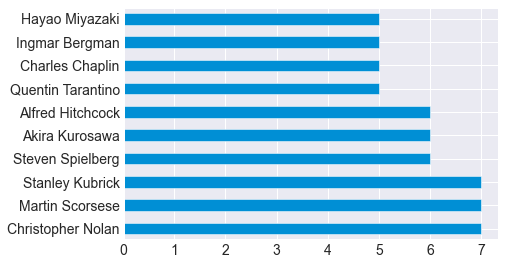

In [33]:
imdb['Director'].value_counts().sort_values(ascending=False).head(10).plot.barh()

#### Top 10 Directors with Highest Average Movie Ratings

<AxesSubplot:ylabel='Director'>

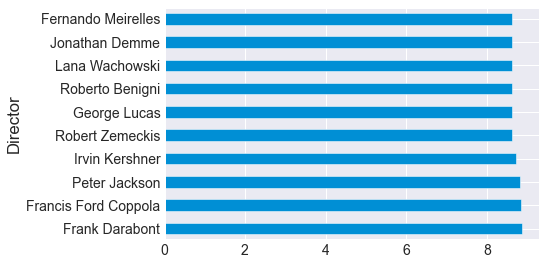

In [39]:
top_director_movies = imdb.groupby('Director')['IMDb Rating'].mean().sort_values(ascending=False).head(10)
top_director_movies.plot.barh()

### Top Actors

In [43]:
actors = imdb.copy()

In [44]:
actors['Lead'] = actors['Starring'].str.split(',').str[0]
actors['Supporting'] = actors['Starring'].str.split(',').str[1]

In [45]:
actors.head()

,IMDb Rating,Starring,users_rated,Title,Rank,Year,Director,Lead,Supporting
0,9.2,"Tim Robbins, Morgan Freeman",2446480,1. The Shawshank Redemption,1,1994,Frank Darabont,Tim Robbins,Morgan Freeman
1,9.1,"Marlon Brando, Al Pacino",1693800,2. The Godfather,2,1972,Francis Ford Coppola,Marlon Brando,Al Pacino
2,9.0,"Al Pacino, Robert De Niro",1176606,3. The Godfather: Part II,3,1974,Francis Ford Coppola,Al Pacino,Robert De Niro
3,9.0,"Christian Bale, Heath Ledger",2402318,4. The Dark Knight,4,2008,Christopher Nolan,Christian Bale,Heath Ledger
4,8.9,"Henry Fonda, Lee J. Cobb",724118,5. 12 Angry Men,5,1957,Sidney Lumet,Henry Fonda,Lee J. Cobb


#### Top 10 Lead Actors in terms of No of Movies

In [140]:
actors['Actor1'].value_counts().sort_values(ascending=False).head(10)

Robert De Niro       6
Tom Hanks            5
Charles Chaplin      5
Leonardo DiCaprio    5
James Stewart        4
Christian Bale       4
Clint Eastwood       4
Toshirô Mifune       4
Jack Nicholson       3
Al Pacino            3
Name: Actor1, dtype: int64

#### Top 10 Lead Actors in terms of Average Movie Rating

In [48]:
actors.groupby('Lead')['IMDb Rating'].mean().sort_values(ascending=False).head(10)

Lead
Tim Robbins        9.20
Liam Neeson        8.90
John Travolta      8.80
Elijah Wood        8.80
Henry Fonda        8.65
Marlon Brando      8.60
Keanu Reeves       8.60
Jodie Foster       8.60
Morgan Freeman     8.60
Roberto Benigni    8.60
Name: IMDb Rating, dtype: float64

Even though, none of the above actors feature amongst top 10 actors with most movies, they sure have featured in the most entertaining ones

#### Top 10 Lead Supporting in terms of No of Movies

In [141]:
actors['Actor2'].value_counts().sort_values(ascending=False).head(10)

 Matt Damon            3
 Harrison Ford         3
 Robert De Niro        3
 Julie Delpy           2
 John Goodman          2
 Joseph Cotten         2
 Gael García Bernal    2
 Alec Guinness         2
 Liv Ullmann           2
 Ian McKellen          2
Name: Actor2, dtype: int64

Overall, Robert De Niro has featured in most movies in Top 250 either as Lead or Supporting actor 

#### Top 10 Supporting Actors in terms of Average Movie Rating

In [49]:
actors.groupby('Supporting')['IMDb Rating'].mean().sort_values(ascending=False).head(10)

Supporting
 Morgan Freeman     9.20
 Al Pacino          9.10
 Heath Ledger       9.00
 Ralph Fiennes      8.90
 Lee J. Cobb        8.90
 Viggo Mortensen    8.90
 Eli Wallach        8.80
 Edward Norton      8.80
 Uma Thurman        8.80
 Ian McKellen       8.75
Name: IMDb Rating, dtype: float64

Morgan Freeman and Al Pacino have been in some of the most remarkable supporting roles

### Movies Ratings

#### Movies Rated by Highest No of Users

In [50]:
imdb.sort_values('users_rated',ascending=False).head(10)

,IMDb Rating,Starring,users_rated,Title,Rank,Year,Director
0,9.2,"Tim Robbins, Morgan Freeman",2446480,1. The Shawshank Redemption,1,1994,Frank Darabont
3,9.0,"Christian Bale, Heath Ledger",2402318,4. The Dark Knight,4,2008,Christopher Nolan
12,8.7,"Leonardo DiCaprio, Joseph Gordon-Levitt",2155025,13. Inception,13,2010,Christopher Nolan
10,8.8,"Brad Pitt, Edward Norton",1928006,11. Fight Club,11,1999,David Fincher
7,8.8,"John Travolta, Uma Thurman",1896803,8. Pulp Fiction,8,1994,Quentin Tarantino
11,8.7,"Tom Hanks, Robin Wright",1891077,12. Forrest Gump,12,1994,Robert Zemeckis
15,8.6,"Keanu Reeves, Laurence Fishburne",1741588,16. The Matrix,16,1999,Lana Wachowski
9,8.8,"Elijah Wood, Ian McKellen",1721325,10. The Lord of the Rings: The Fellowship of ...,10,2001,Peter Jackson
6,8.9,"Elijah Wood, Viggo Mortensen",1700231,7. The Lord of the Rings: The Return of the K...,7,2003,Peter Jackson
1,9.1,"Marlon Brando, Al Pacino",1693800,2. The Godfather,2,1972,Francis Ford Coppola


#### Ratings Distribution

In [51]:
# Minimum Rating
imdb['IMDb Rating'].min()

8.0

In [52]:
# Maximum Rating
imdb['IMDb Rating'].max()

9.2

<AxesSubplot:ylabel='Frequency'>

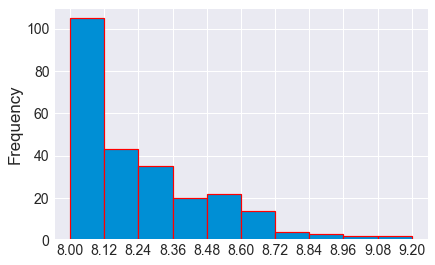

In [127]:
count, bin_edges=np.histogram(imdb['IMDb Rating'])

imdb['IMDb Rating'].plot.hist(xticks=bin_edges, edgecolor='red', linewidth=1.2)

In [55]:
imdb['IMDb Rating'].value_counts(bins=5, normalize=True)*100

(7.997999999999999, 8.24]    59.2
(8.24, 8.48]                 22.0
(8.48, 8.72]                 14.4
(8.72, 8.96]                  2.8
(8.96, 9.2]                   1.6
Name: IMDb Rating, dtype: float64

60% of movies in Top 250 are rated 8.0 - 8.24